In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [45]:
def DTWDistance(s1, s2, w = None):
    rows = len(s1) + 1
    cols = len(s2) + 1
    DTW = np.zeros((rows, cols))
    
    if w:
        w = max(w, abs(len(s1)-len(s2)))
        
        for i in range(0, rows):
            for j in range(0, cols):
                DTW[i, j] = float('inf')
        
        DTW[0, 0] = 0
        
        for i in range(1, rows):
            for j in range(max(1, i-w), min(cols, i+w+1)):
                DTW[i, j] = 0
        
        distance = 0
        
        for i in range(1, rows):
            for j in range(max(1, i-w), min(cols, i+w+1)):
                distance = (s1[i-1] - s2[j-1]) ** 2
                DTW[i,j] = distance + min(DTW[i-1,j], DTW[i-1,j-1], DTW[i, j-1])
    return DTW[len(s1), len(s2)]

In [46]:
valori_ts = []
classi = []

path = ""

# calcoliamo le features di ogni timeseries

with open(path + 'Swissex.meta.csv', 'r', encoding='utf-8') as dati:
    for row in dati:
        riga = row.strip().split(',')
        classe = int(riga[8])
        classi.append(classe)
        valori = np.array(riga[9:]).astype(np.float)
        valori_ts.append(valori)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(valori_ts, classi, test_size = 0.3, random_state = 100)

In [48]:
from sklearn.preprocessing import RobustScaler

X_train = RobustScaler().fit_transform(X_train)
X_test = RobustScaler().fit_transform(X_test)

In [42]:
# 1NN-ED

knn = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)*100
print(accuracy)

47.11538461538461


In [43]:
# 1NN-DTW (testare diversi parametri w)

knn = KNeighborsClassifier(n_neighbors = 1, metric = DTWDistance, metric_params = {'w': 3})
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)*100
print(accuracy)

50.96153846153846


In [49]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [52]:
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import ShapeletModel, grabocka_params_to_shapelet_size_dict
from tslearn.utils import to_time_series_dataset

Using TensorFlow backend.
W0806 15:25:17.821139  8812 deprecation_wrapper.py:119] From C:\Users\Tania\Anaconda3\lib\site-packages\tslearn\shapelets.py:17: The name tf.set_random_seed is deprecated. Please use tf.compat.v1.set_random_seed instead.



In [53]:
X_train = to_time_series_dataset(X_train)
X_test = to_time_series_dataset(X_test)

shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=len(valori_ts), ts_sz=len(valori_ts[0]),
                                                       n_classes=len(set(y_train)), l=0.1, r=2)

In [54]:
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes, verbose_level = 0)

In [59]:
shp_clf.fit(np.array(X_train), np.array(y_train))
y_pred = shp_clf.predict(np.array(X_test))

In [60]:
accuracy = accuracy_score(y_pred, y_test)*100
accuracy

20.192307692307693

In [29]:
cd shaplets-python-master

C:\Users\Tania\Python Notebooks\shaplets-python-master


In [30]:
pip install .

Processing c:\users\tania\python notebooks\shaplets-python-master
  Stored in directory: C:\Users\Tania\AppData\Local\pip\Cache\wheels\14\cd\05\91e6aafbb67f3315b12b44e5a64b79a08ce4e9b0f17ccf3911
Successfully built shapelets-lts
  Found existing installation: shapelets-lts 0.3.0
    Uninstalling shapelets-lts-0.3.0:
      Successfully uninstalled shapelets-lts-0.3.0
Note: you may need to restart the kernel to use updated packages.


In [31]:
from shapelets_lts.classification import LtsShapeletClassifier

In [32]:
classifier = LtsShapeletClassifier(
    K=20,
    R=3,
    L_min=30,
    epocs=50,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=True
)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/50 (iteration=242) loss=3.2597392131494325 validation accuracy=0.23553719008264462


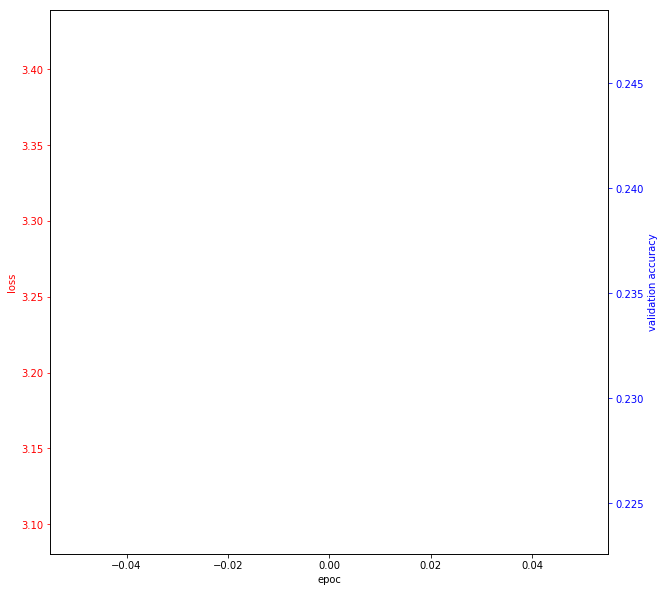

epoch=2/50 (iteration=484) loss=3.3258183290818435 validation accuracy=0.23553719008264462
epoch=3/50 (iteration=726) loss=3.3338477024602184 validation accuracy=0.3140495867768595
epoch=4/50 (iteration=968) loss=3.327766570065497 validation accuracy=0.3140495867768595
epoch=5/50 (iteration=1210) loss=3.3252729348789796 validation accuracy=0.3140495867768595
epoch=6/50 (iteration=1452) loss=3.3251217276041776 validation accuracy=0.3140495867768595
epoch=7/50 (iteration=1694) loss=3.3259044781411817 validation accuracy=0.3140495867768595
epoch=8/50 (iteration=1936) loss=3.3269403823268 validation accuracy=0.3140495867768595
epoch=9/50 (iteration=2178) loss=3.3279065875298457 validation accuracy=0.3140495867768595
epoch=10/50 (iteration=2420) loss=3.3286476323947536 validation accuracy=0.3140495867768595
epoch=11/50 (iteration=2662) loss=3.329092220809924 validation accuracy=0.3140495867768595
epoch=12/50 (iteration=2904) loss=3.329214392475678 validation accuracy=0.3181818181818182
epoc

LtsShapeletClassifier(K=20, L_min=30, R=3, alpha=-100, epocs=50, eta=0.01,
                      lamda=0.01, plot_loss=True,
                      shapelet_initialization='segments_centroids')

<Figure size 432x288 with 0 Axes>

In [36]:
classifier.fit(np.array(X_train), np.array(y_train))

In [42]:
y_pred = classifier.predict(X_test)

In [44]:
accuracy = accuracy_score(y_pred, y_test)*100
accuracy

11.538461538461538